调整后数据均值: 215.27502124086956
目标分位数值: [209.33, 210.64, 213.7, 216.57, 219.94, 245.1, 250.43]
计算出的分位数值: [209.3300385  210.64002567 213.700022   216.57002567 219.94003992
 245.10007842 250.43055002]


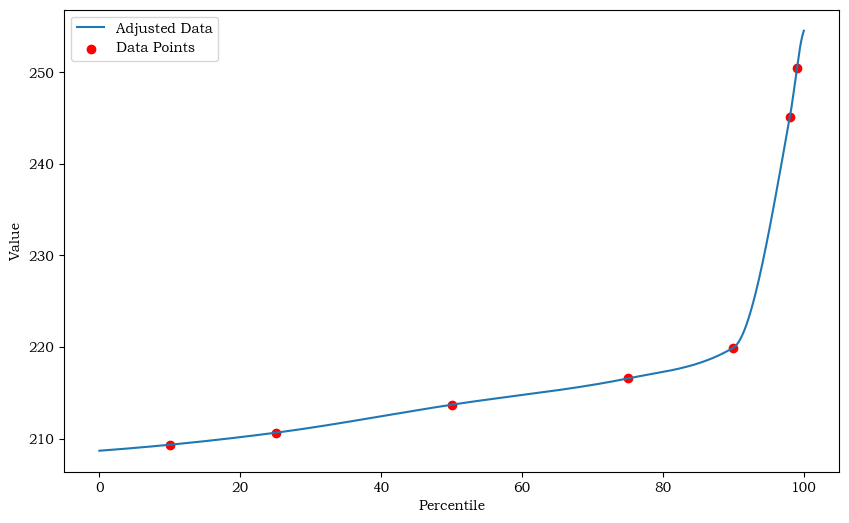

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import PchipInterpolator

percentiles = [10, 25, 50, 75, 90, 98, 99]
values = [209.33, 210.64, 213.7, 216.57, 219.94, 245.1,  250.43]
target_average = 215.33



# 生成插值位置
x_new = np.linspace(0, 100, 100000, dtype=np.float64)

# 创建 PCHIP 插值对象
pchip = PchipInterpolator(percentiles, values)

# 初始插值数据
data = pchip(x_new)

# 多次迭代调整数据
for _ in range(10):  # 迭代次数
    average_error = target_average - np.mean(data)
    percentile_indices = [0] + [int(p / 100 * len(data)) for p in percentiles] + [len(data)]
    for i in range(len(percentile_indices) - 1):
        start_index = percentile_indices[i]
        end_index = percentile_indices[i + 1]
        adjustment_indices = np.arange(start_index, end_index)
        data[adjustment_indices] += average_error / len(adjustment_indices)

# 打印调整后的均值
print("调整后数据均值:", np.mean(data))

# 计算生成数据的各个分位数
calculated_percentiles = np.percentile(data, percentiles)

# 打印计算出的分位数
print("目标分位数值:", values)
print("计算出的分位数值:", calculated_percentiles)

# 绘制调整后的数据
plt.figure(figsize=(10, 6))
plt.plot(x_new, data, label='Adjusted Data')
plt.scatter(percentiles, values, color='red', label='Data Points')
plt.xlabel('Percentile')
plt.ylabel('Value')
plt.legend()
plt.show()

In [2]:
df = pd.DataFrame(data, columns=['Value'])
df.to_excel('CapeTown_Bahrain.xlsx', index=False)